In [4]:
# Import necessary libraries
from itertools import combinations
import numpy as np

# Function to solve a system of equations
def solveSystem(equations):
    try:
        # Extract coefficients and constants from equations
        coefficients = [eq[:-1] for eq in equations]
        constants = [eq[-1] for eq in equations]
        
        # Solve the system of equations using numpy's linalg.solve
        solutions = np.linalg.solve(coefficients, constants)
        return solutions
    except np.linalg.LinAlgError:
        # Return None if the system is singular or not solvable
        return None

# Function to evaluate a defined function at a given solution point
def evaluateFunction(solution):
    x, y, z = solution
    return x - y

# Function to check if a solution point satisfies all region constraints
def check_region_constraints(solution):
    x, y, z = solution
    # Define region constraints as a list of inequalities
    constraints = [
        x - y - z >= -4,
        x + 2*y + 2*z >= 2,
        x + y - z >= -2,
        -x - y + z >= -1,
        4*x - 2*y + z >= 1,
        -6*x + 4*y - z >= -10
    ]
    return all(constraints)

# Function to solve combinations of restrictions and find vertices within the region
def solveRestrictions(equations, dimension):
    # Generate combinations of equations and define lists to store them
    systems = list(combinations(equations, dimension))
    unsolvable_systems = []
    # List to store the points of each solution within the region
    vertices = [] 


    # Iterate through combinations of equations and solve each system
    print("\t\t\tSystems with solution:")
    for comb in systems:
        solution = solveSystem(comb) 
        
        # If solution exist
        if solution is not None:
            solution_tuple = tuple(np.round(solution, 4))
            
            # Display the solution of the combination of equations
            print("-   Point:", solution_tuple)
            
            # Evaluate the function at the solution point
            value = evaluateFunction(solution)
            print("-   Value of f(x,y,z) at this point:", np.round(value, 4))
            
            # Show the related system of equations
            print("Constraints:")
            for eq in comb:
                print(eq)
            print()
            
            # Check if the solution satisfies the region constraints
            if check_region_constraints(solution):
                vertices.append(solution_tuple) # Store each point within the region
                print("This point is WITHIN the specified region.\n\n")
            else:
                print("This point is OUTSIDE the specified region.\n\n")
        
        # If no solution exists
        else:
            unsolvable_systems.append(comb)
    
    # Display the unsolvable systems
    print("\t\t\tSystems with no solution:")
    for sys in unsolvable_systems:
        print("Constraints:")
        for eq in sys:
            print(eq)
        print()
        
    return vertices

def main():
    # Define equations (inequalities)
    restrictions = [
        [1, -1, -1, -4],
        [1, 2, 2, 2],
        [1, 1, -1, -2],
        [-1, -1, 1, -1],
        [4, -2, 1, 1],
        [-6, 4, -1, -10]
    ]

    # Dimension of the system
    dimension = 3

    # Generate unique combinations and solve systems
    vertices = solveRestrictions(restrictions, dimension)
    
    # Display the points that are within the restricted region
    print("\nPoints that satisfy the region constraints:\n")
    for point in vertices:
        print("\t",point)

if __name__ == "__main__":
    main()

			Systems with solution:
-   Point: (-2.0, 1.0, 1.0)
-   Value of f(x,y,z) at this point: -3.0
Constraints:
[1, -1, -1, -4]
[1, 2, 2, 2]
[1, 1, -1, -2]

This point is OUTSIDE the specified region.


-   Point: (-2.0, 2.5, -0.5)
-   Value of f(x,y,z) at this point: -4.5
Constraints:
[1, -1, -1, -4]
[1, 2, 2, 2]
[-1, -1, 1, -1]

This point is OUTSIDE the specified region.


-   Point: (-2.0, -2.3333, 4.3333)
-   Value of f(x,y,z) at this point: 0.3333
Constraints:
[1, -1, -1, -4]
[1, 2, 2, 2]
[4, -2, 1, 1]

This point is OUTSIDE the specified region.


-   Point: (-2.0, -4.0, 6.0)
-   Value of f(x,y,z) at this point: 2.0
Constraints:
[1, -1, -1, -4]
[1, 2, 2, 2]
[-6, 4, -1, -10]

This point is OUTSIDE the specified region.


-   Point: (0.0, 1.0, 3.0)
-   Value of f(x,y,z) at this point: -1.0
Constraints:
[1, -1, -1, -4]
[1, 1, -1, -2]
[4, -2, 1, 1]

This point is WITHIN the specified region.


-   Point: (1.5714, 1.0, 4.5714)
-   Value of f(x,y,z) at this point: 0.5714
Constraints:
[1,

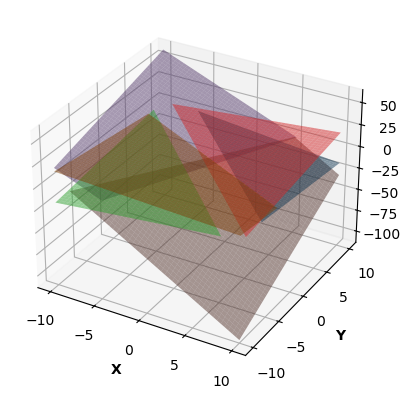

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Define inequalities
inequalities = [
    lambda x, y: -x - y + 4,
    lambda x, y: -x / 2 - y + 2,
    lambda x, y: x + y + 2,
    lambda x, y: x + y - 1,
    lambda x, y: -4*x + 2*y + 1,
    lambda x, y: -6*x + 4*y - 10
]

# Create a grid of points
x, y = np.meshgrid(np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000))

# Plot the surfaces
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, inequality in enumerate(inequalities):
    # Inequalities z <= expression
    if i in [0, 2, 5]:  
        ax.plot_surface(x, y, np.where(inequality(x, y) <= 0, inequality(x, y), np.nan), alpha=0.5)
    # Inequalities z >= expression
    else: 
        ax.plot_surface(x, y, np.where(inequality(x, y) >= 0, inequality(x, y), np.nan), alpha=0.5)
 
# Set the axis
ax.set_xlabel('X', fontweight = 'bold')
ax.set_ylabel('Y', fontweight = 'bold')
ax.set_zlabel('Z', fontweight = 'bold')

plt.show()


			Systems with solution:
-   Point: (-2.0, 1.0, 1.0)
-   Value of f(x,y,z) at this point: -3.0
Constraints:
[1, -1, -1, -4]
[1, 2, 2, 2]
[1, 1, -1, -2]

This point is OUTSIDE the specified region.


-   Point: (-2.0, 2.5, -0.5)
-   Value of f(x,y,z) at this point: -4.5
Constraints:
[1, -1, -1, -4]
[1, 2, 2, 2]
[-1, -1, 1, -1]

This point is OUTSIDE the specified region.


-   Point: (-2.0, -2.3333, 4.3333)
-   Value of f(x,y,z) at this point: 0.3333
Constraints:
[1, -1, -1, -4]
[1, 2, 2, 2]
[4, -2, 1, 1]

This point is OUTSIDE the specified region.


-   Point: (-2.0, -4.0, 6.0)
-   Value of f(x,y,z) at this point: 2.0
Constraints:
[1, -1, -1, -4]
[1, 2, 2, 2]
[-6, 4, -1, -10]

This point is OUTSIDE the specified region.


-   Point: (0.0, 1.0, 3.0)
-   Value of f(x,y,z) at this point: -1.0
Constraints:
[1, -1, -1, -4]
[1, 1, -1, -2]
[4, -2, 1, 1]

This point is WITHIN the specified region.


-   Point: (1.5714, 1.0, 4.5714)
-   Value of f(x,y,z) at this point: 0.5714
Constraints:
[1,

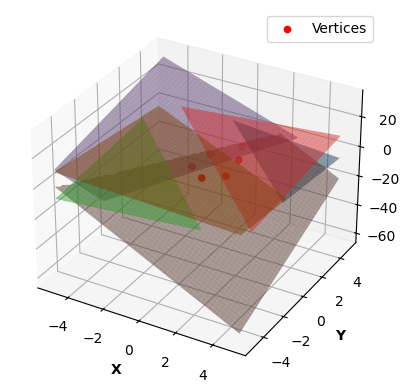

In [9]:
# Import necessary libraries
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to solve a system of equations
def solveSystem(equations):
    try:
        # Extract coefficients and constants from equations
        coefficients = [eq[:-1] for eq in equations]
        constants = [eq[-1] for eq in equations]
        
        # Solve the system of equations using numpy's linalg.solve
        solutions = np.linalg.solve(coefficients, constants)
        return solutions
    except np.linalg.LinAlgError:
        # Return None if the system is singular or not solvable
        return None

# Function to evaluate a defined function at a given solution point
def evaluateFunction(solution):
    x, y, z = solution
    return x - y

# Function to check if a solution point satisfies all region constraints
def check_region_constraints(solution):
    x, y, z = solution
    # Define region constraints as a list of inequalities
    constraints = [
        x - y - z >= -4,
        x + 2*y + 2*z >= 2,
        x + y - z >= -2,
        -x - y + z >= -1,
        4*x - 2*y + z >= 1,
        -6*x + 4*y - z >= -10
    ]
    return all(constraints)

# Function to solve combinations of restrictions and find vertices within the region
def solveRestrictions(equations, dimension):
    # Generate combinations of equations and define lists to store them
    systems = list(combinations(equations, dimension))
    unsolvable_systems = []
    # List to store the points of each solution within the region
    vertices = [] 


    # Iterate through combinations of equations and solve each system
    print("\t\t\tSystems with solution:")
    for comb in systems:
        solution = solveSystem(comb) 
        
        # If solution exist
        if solution is not None:
            solution_tuple = tuple(np.round(solution, 4))
            
            # Display the solution of the combination of equations
            print("-   Point:", solution_tuple)
            
            # Evaluate the function at the solution point
            value = evaluateFunction(solution)
            print("-   Value of f(x,y,z) at this point:", np.round(value, 4))
            
            # Show the related system of equations
            print("Constraints:")
            for eq in comb:
                print(eq)
            print()
            
            # Check if the solution satisfies the region constraints
            if check_region_constraints(solution):
                vertices.append(solution_tuple) # Store each point within the region
                print("This point is WITHIN the specified region.\n\n")
            else:
                print("This point is OUTSIDE the specified region.\n\n")
        
        # If no solution exists
        else:
            unsolvable_systems.append(comb)
    
    # Display the unsolvable systems
    print("\t\t\tSystems with no solution:")
    for sys in unsolvable_systems:
        print("Constraints:")
        for eq in sys:
            print(eq)
        print()
        
    return vertices

def plotSystems(vertices):
    # Define inequalities
    inequalities = [
        lambda x, y: -x - y + 4,
        lambda x, y: -x / 2 - y + 2,
        lambda x, y: x + y + 2,
        lambda x, y: x + y - 1,
        lambda x, y: -4*x + 2*y + 1,
        lambda x, y: -6*x + 4*y - 10
    ]

    # Create a grid of points
    x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

    # Plot the surfaces
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i, inequality in enumerate(inequalities):
        # Inequalities z <= expression
        if i in [0, 2, 5]:  
            ax.plot_surface(x, y, np.where(inequality(x, y) <= 0, inequality(x, y), np.nan), alpha=0.5)
        # Inequalities z >= expression
        else: 
            ax.plot_surface(x, y, np.where(inequality(x, y) >= 0, inequality(x, y), np.nan), alpha=0.5)
    
    # Set the axis
    ax.set_xlabel('X', fontweight = 'bold')
    ax.set_ylabel('Y', fontweight = 'bold')
    ax.set_zlabel('Z', fontweight = 'bold')
    
    # Extract x, y, z coordinates from each point of the vertices
    x_vertices = [vertex[0] for vertex in vertices]
    y_vertices = [vertex[1] for vertex in vertices]
    z_vertices = [vertex[2] for vertex in vertices]

    # Plot the vertices
    ax.scatter(x_vertices, y_vertices, z_vertices, color='red', label='Vertices')

    # Show legend and plot
    ax.legend()
    plt.show()
    

def main():
    # Define equations (inequalities)
    restrictions = [
        [1, -1, -1, -4],
        [1, 2, 2, 2],
        [1, 1, -1, -2],
        [-1, -1, 1, -1],
        [4, -2, 1, 1],
        [-6, 4, -1, -10]
    ]

    # Dimension of the system
    dimension = 3

    # Generate unique combinations and solve systems
    vertices = solveRestrictions(restrictions, dimension)
    
    # Display the points that are within the restricted region
    print("\nPoints that satisfy the region constraints:\n")
    for point in vertices:
        print("\t",point)
    
    # Plot the system of restrictions and the points within the region    
    plotSystems(vertices)

if __name__ == "__main__":
    main()